In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 101.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.4 MB/s eta 0:00:00


In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.0 MB/s eta 0:00:00


In [ ]:
!pip install pytorch-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 49.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 104.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 12.7 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895259 sha256=c3552b16af5ab6a6ecf82599c944b2488dae30ca4de0b15b90c9906f7a2123a8
  Stored in directory: /root/.cache/pip/wheels/12/1c/3d/46cf06718d63a32ff798a89594b61e7f345ab6b36d909ce033
Successfully built sacremoses


In [ ]:
import numpy as np
import pandas as pd
import re
import random

#visulaization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import NLTK library which focus on making natural human language usable by computer programs
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

#importing svm model and multi-class classifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

#importing metric evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers

from keras.callbacks import TensorBoard
from tensorflow.keras import layers
import datetime
import tensorflow_hub as hub

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torchvision
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [ ]:
from pytorch_transformers import XLNetModel, XLNetTokenizer, XLNetForSequenceClassification

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/fakenews.zip','r') as zipobj:
  zipobj.extractall('fake-news')

In [ ]:
fake = pd.read_csv('/content/fake-news/Fake.csv/Fake.csv')
true = pd.read_csv('/content/fake-news/True.csv/True.csv')

In [ ]:
fake['title'][1]

' Drunk Bragging Trump Staffer Started Russian Collusion Investigation'

In [ ]:
fake['text'][1]

'House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys  don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former aide set up meetings with world leaders for Trump, but team Tr

In [ ]:
fake['news'] = fake['title'] +'. ' +fake['text']
true['news'] = true['title'] +' ' +true['text']

In [ ]:
fake['label'] = 1
true['label'] = 0

In [ ]:
data = pd.concat([fake,true])[['news', 'label']]

In [ ]:
data = data.sample(frac=1)

In [ ]:
data

,news,label
4732,The Trump presidency on March 23 at 7:03 P.M. ...,0
8146,Elizabeth Warren Just Did Something Amazing F...,1
8709,Cleveland police say no shots fired on vehicle...,0
13540,OFF-DUTY POLICE OFFICER SHOOTS AND KILLS Black...,1
7176,Most ACCURATE Political Scientist Just Releas...,1
...,...,...
13712,Chinese general kills himself amid corruption ...,0
19638,HUNDREDS VOTING FROM THE GRAVE In This Califor...,1
8368,‘Christian’ Dad Beat Daughter With Frozen Bac...,1
4500,Louisiana Cop Claims Murdering A 6-Year Old C...,1


# Model 1

In [ ]:
train_x = data['news'][0:36000]
test_x = data['news'][36000:]

train_y = np.array(data['label'])[0:36000]
test_y = np.array(data['label'][36000:])

test_y = test_y.reshape(8898,1)
train_y = train_y.reshape(36000,1)

xlnet

In [ ]:

from transformers import TFXLNetModel, XLNetTokenizer
xlnet_model = 'xlnet-base-cased'
xlnet_tokenizer = XLNetTokenizer.from_pretrained(xlnet_model)

In [ ]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)


In [ ]:
test_x

10998    Marco Rubio becomes early hope for mainstream ...
4282      Hillary Just Responded To Trump’s Pre-Debate ...
20119    Japan's Abe says U.N. resolution must force ch...
19581    BRAVO! LAURA INGRAHAM DESTROYS JUAN WILLIAMS O...
20082    HOLLYWOOD LIBS Raise Big Money For #CrookedHil...
                               ...                        
13712    Chinese general kills himself amid corruption ...
19638    HUNDREDS VOTING FROM THE GRAVE In This Califor...
8368      ‘Christian’ Dad Beat Daughter With Frozen Bac...
4500      Louisiana Cop Claims Murdering A 6-Year Old C...
14557    German parties must reach coalition deal this ...
Name: news, Length: 8898, dtype: object

In [ ]:

tokenized_train = [tokenizer.tokenize(sent) for sent in train_x]
tokenized_test = [tokenizer.tokenize(sent) for sent in test_x]

print ("Tokenize the first sentence:")
print (tokenized_train[88])

Tokenize the first sentence:
['▁', 'ber', 'nie', '’', 's', '▁world', ':', '▁socialism', '▁forces', '▁', 'ven', 'ez', 'uel', 'ans', '▁to', '▁eat', '▁dogs', ',', '▁cats', '▁and', '▁birds', ',', '▁“', 'we', '▁are', '▁hungry', '”', '.', '▁take', '▁a', '▁good', '▁hard', '▁look', '▁', 'america', '▁this', '▁is', '▁', 'ber', 'nie', '▁', 's', '▁', 'ut', 'opia', '.', '▁the', '▁economic', '▁climate', '▁is', '▁so', '▁bad', '▁in', '▁', 've', 'ne', 'zu', 'ela', '▁today', '▁that', '▁people', '▁are', '▁eating', '▁cats', ',', '▁dogs', '▁and', '▁pigeon', 's', '.', 'the', '▁pan', 'ama', '▁post', '▁reported', ',', '▁via', '▁town', 'hall', ':', 'ram', '▁', 'n', '▁much', 'a', 'cho', ',', '▁mayor', '▁of', '▁', 'cha', 'ca', 'o', '▁in', '▁car', 'aca', 's', ',', '▁said', '▁the', '▁streets', '▁of', '▁the', '▁capital', '▁of', '▁', 've', 'ne', 'zu', 'ela', '▁are', '▁filled', '▁with', '▁people', '▁killing', '▁animals', '▁for', '▁food', '.', 'through', '▁twitter', ',', '▁much', 'a', 'cho', '▁reported', '▁that', '▁in

In [ ]:

# Set the maximum sequence length.
MAX_LEN = 64

input_ids_train = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_train]
input_ids_test = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_test]

In [ ]:

# Pad our input tokens

input_ids_train = pad_sequences(input_ids_train, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
input_ids_test = pad_sequences(input_ids_test, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [ ]:
# Create attention masks
attention_masks_train = []
attention_masks_test = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids_train:
  seq_mask = [float(i>0) for i in seq]
  attention_masks_train.append(seq_mask)

for seq in input_ids_test:
  seq_mask = [float(i>0) for i in seq]
  attention_masks_test.append(seq_mask)

In [ ]:
def create_model_xlnet(xlnet_model):
    word_inputs = tf.keras.Input(shape=(64,), name='word_inputs', dtype='int32')


    xlnet = TFXLNetModel.from_pretrained(xlnet_model)
    xlnet_encodings = xlnet(word_inputs)[0]

    # Collect last step from last hidden state (CLS)
    doc_encoding = tf.squeeze(xlnet_encodings[:, -1:, :], axis=1)

    doc_encoding = tf.keras.layers.Dropout(.1)(doc_encoding)

    outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(doc_encoding)

    model = tf.keras.Model(inputs=[word_inputs], outputs=[outputs])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

    return model
#learning rate = 2e-5

In [ ]:

xlnet = create_model_xlnet(xlnet_model)
xlnet.summary()

Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 word_inputs (InputLayer)    [(None, 64)]              0         
                                                                 
 tfxl_net_model_1 (TFXLNetMo  TFXLNetModelOutput(last_  116718336
 del)                        hidden_state=(None, 64,             
                             768),                               
                              mems=((64, None, 768),             
                              (64, None, 768),                   
                              (64, None, 768),                   
                              (64, None, 768),                   
                              (64, None, 768),                   
                              (64, None, 768),                   
                              (64, None, 768),                   
                              (64, None, 768),             

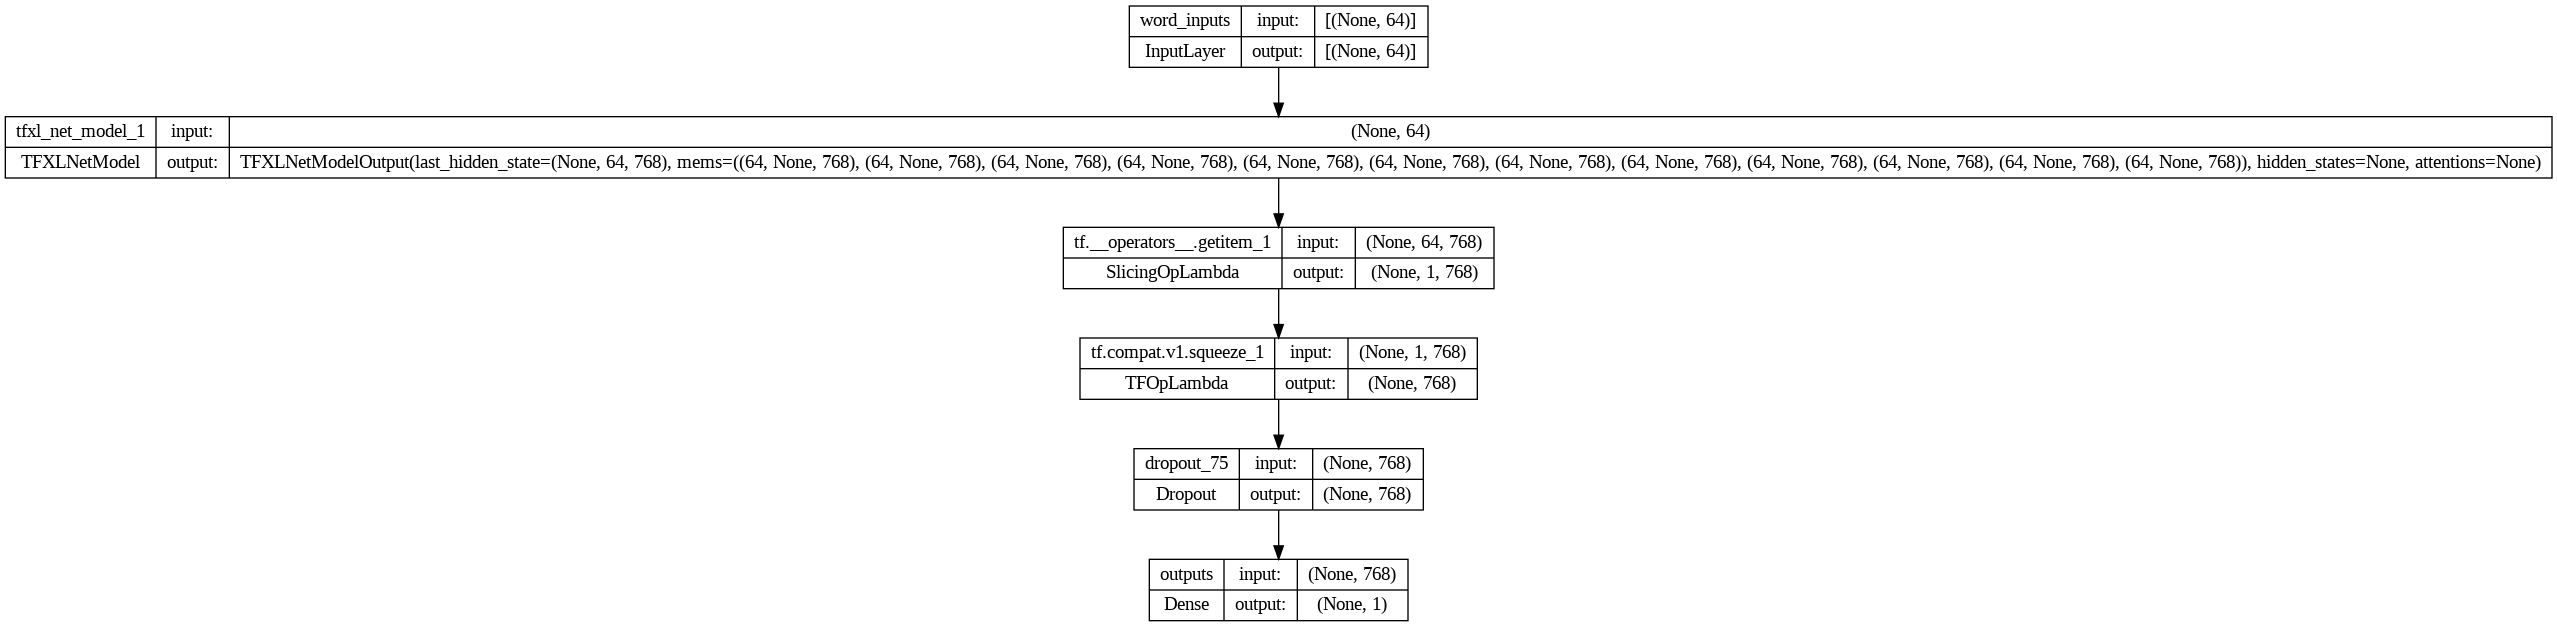

In [ ]:
plot_model(xlnet, to_file='model_xl.png', expand_nested=True, show_shapes=True)


In [ ]:
# input_ids_tr = input_ids_train[:36000]
# input_ids_te = input_ids_train[36000:]

In [ ]:
model_7_history = xlnet.fit(input_ids_train,train_y,validation_data=(input_ids_test,test_y), epochs=8)


Epoch 1/8


1125/1125 [==============================] - 650s 548ms/step - loss: 0.0131 - accuracy: 0.9955 - val_loss: 4.6547e-04 - val_accuracy: 0.9999
Epoch 2/8
1125/1125 [==============================] - 604s 537ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 5.8364e-07 - val_accuracy: 1.0000
Epoch 3/8
1125/1125 [==============================] - 602s 535ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 8.6205e-06 - val_accuracy: 1.0000
Epoch 4/8
1125/1125 [==============================] - 598s 531ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 5.6708e-05 - val_accuracy: 1.0000
Epoch 5/8
1125/1125 [==============================] - 603s 536ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 1.9076e-04 - val_accuracy: 0.9999
Epoch 6/8
1125/1125 [==============================] - 562s 499ms/step - loss: 7.1097e-04 - accuracy: 0.9998 - val_loss: 3.2634e-04 - val_accuracy: 0.9999
Epoch 7/8
1125/1125 [==============================] - 601s 535ms/step - loss: 5.5146e-04 - accuracy

In [ ]:
xlnet.save("/content/drive/MyDrive/b")

In [ ]:
xlnet.save('/content/drive/MyDrive/b/fake_news_model.h5')

In [ ]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [ ]:
lr_probs = xlnet.predict(input_ids_test)
lr_probs[:10]

279/279 [==============================] - 45s 150ms/step


array([[1.4281286e-08],
       [9.9999964e-01],
       [5.0183213e-09],
       [9.9999964e-01],
       [9.9999964e-01],
       [9.2050650e-10],
       [1.1316481e-10],
       [9.9999964e-01],
       [9.9999964e-01],
       [9.9999964e-01]], dtype=float32)

In [ ]:
predictions = [1 if x > 0.499 else 0 for x in lr_probs]
predictions[:10]

[0, 1, 0, 1, 1, 0, 0, 1, 1, 1]

In [ ]:
lr_precision, lr_recall, _ = precision_recall_curve(test_y, lr_probs)


In [ ]:
lr_f1, lr_auc = f1_score(test_y, predictions), auc(lr_recall, lr_precision)


In [ ]:
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))


Logistic: f1=1.000 auc=1.000


In [ ]:
no_skill = len(test_y[test_y==1]) / len(test_y)
no_skill

0.5274218925601258

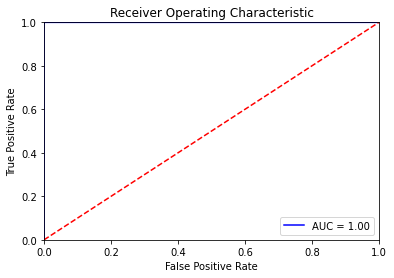

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, lr_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()